## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [50]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Check dimension of data

In [32]:
iris.shape

(152, 6)

In [ ]:
#Check data Type

In [33]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Check for NaN/Null values

In [5]:
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [7]:
#iris.tail()

In [34]:
# Replacing the missing values with median
iris1 = iris.fillna(iris.median())
iris1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


In [9]:
iris.shape

(152, 6)

In [10]:
X = iris1.drop(["Species"], axis=1)
y = iris1["Species"]


In [11]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

### Find the distribution of target variable (Class) (1 Marks)

In [16]:
#import seaborn as sns
#sns.distplot(iris['Species'], kde=False)


### Plot the distribution of target variable using histogram

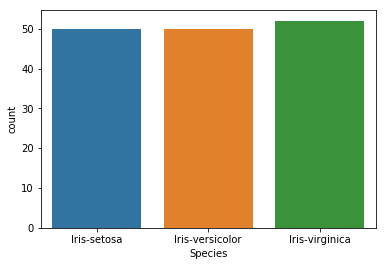

In [13]:
import seaborn as sns
sns.countplot(iris['Species'])

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

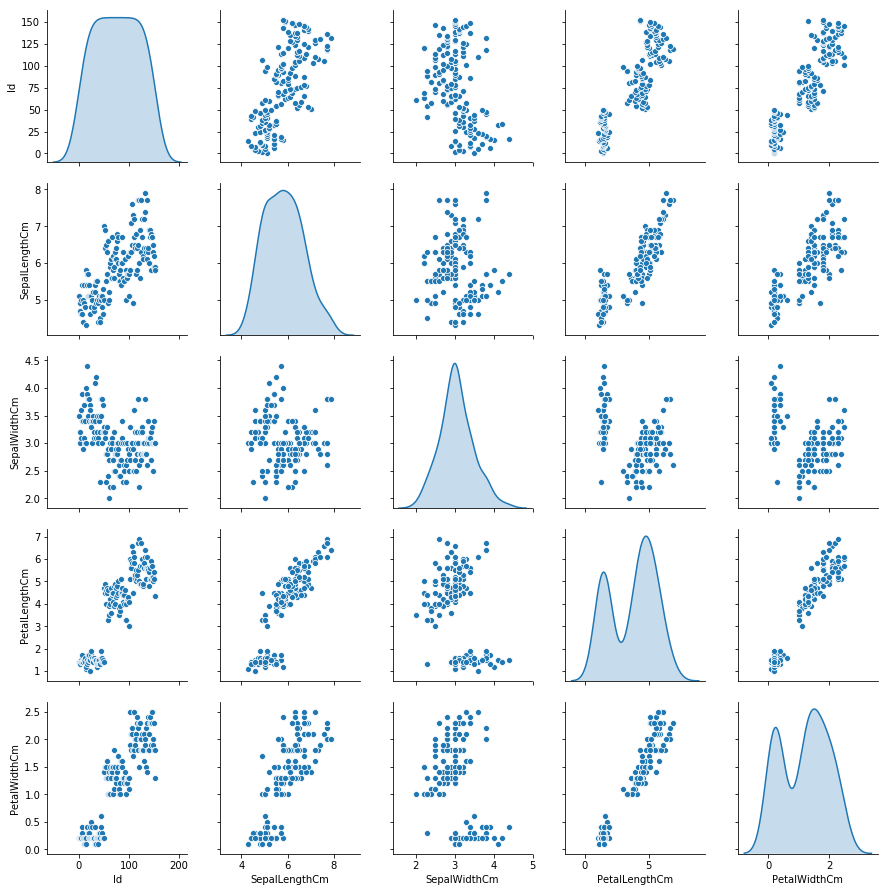

In [140]:
import seaborn as sns
sns.pairplot(iris1, diag_kind='kde')

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [19]:
#Drop Id variable from data
iris1 = iris1.drop("Id", axis=1)


In [20]:
iris1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Correlation among all variables and give your insights (1 Marks)

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [21]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.710342,-0.397729,0.882747,0.897900
SepalLengthCm,0.710342,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.897900,0.817954,-0.356544,0.962757,1.000000


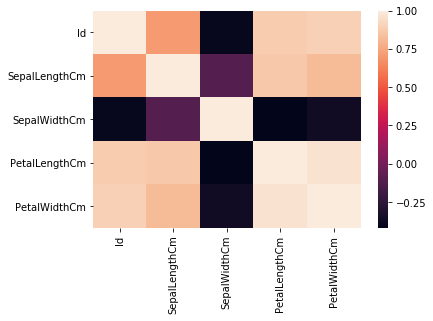

In [276]:
sns.heatmap(iris.corr())

### Split data in Training and Validation in 80:20 (1 Marks)

In [ ]:
### SPLITTING INTO TRAINING AND TEST SETS

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


### Do Feature Scaling ( 1 Marks)

In [167]:
# Use StandardScaler or similar methods

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print('---------------')
print(y_train)

[[ 1.20387767  0.31475449 -0.19518921  0.67741699  0.80566741]
 [ 1.52277818  1.32363642  0.03411074  0.7922978   1.46257951]
 [ 1.36332793  0.31475449 -1.11238902  1.07949982  0.28013772]
 [ 0.67996969  0.81919545 -0.19518921  1.19438063  1.33119709]
 [ 1.2949921   2.58473883  1.63921039  1.53902305  1.06843225]
 [ 0.13328309 -0.44190696 -1.57098892  0.04557255 -0.11400954]
 [-1.62066972 -1.57689913  0.03411074 -1.27555673 -1.29645133]
 [-1.48399807 -1.19856841  0.03411074 -1.27555673 -1.42783375]
 [-0.55007515  1.44974666  0.26341069  0.56253619  0.28013772]
 [ 1.75056426 -0.06357624 -0.19518921  0.36149477  0.80566741]
 [ 0.33829057 -0.44190696 -1.34168897  0.16045336  0.1487553 ]
 [ 0.74830551  1.82807738 -0.42448916  1.48158265  0.80566741]
 [-1.57511251 -0.5680172   1.86851034 -1.16067593 -1.03368649]
 [-0.07172438  0.31475449 -0.65378911  0.16045336  0.1487553 ]
 [ 0.22439753 -0.5680172  -0.19518921  0.44765538  0.41152015]
 [-0.29951046  0.062534   -0.19518921  0.27533417  0.41

### Train and Fit NaiveBayes Model(2 Marks)

In [ ]:
#Fit the model

In [24]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predict

In [25]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype='<U15')

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [ ]:
# show Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 12]], dtype=int64)

In [ ]:
# show accuracy

In [27]:
from sklearn.metrics import  accuracy_score

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.967741935483871


In [ ]:
#Show precision and Recall metrics

In [28]:
from sklearn.metrics import  classification_report
print('classification_report:', classification_report(y_test, y_pred))

classification_report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        13

      micro avg       0.97      0.97      0.97        31
      macro avg       0.97      0.97      0.97        31
   weighted avg       0.97      0.97      0.97        31



## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [103]:
import warnings 
warnings.filterwarnings('ignore')


KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [104]:
irisk = pd.read_csv("iris.csv")
irisk

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [59]:
irisk.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [171]:
# Replacing missing values with median 
irisk1 = irisk.fillna(iris.median())
irisk1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [124]:
#iriskn = irisk['Species'].replace(['Iris-setosa','0'],['Iris-virginica','1'],['Iris-versicolor','2'], inplace = False)

In [173]:
irisk1['Species'].replace('Iris-setosa','0', inplace = True)
irisk1['Species'].replace('Iris-virginica','1', inplace = True)
irisk1['Species'].replace('Iris-versicolor','2', inplace = True)

In [174]:
irisk1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


In [176]:
irisk1 = irisk1.drop("Id", axis=1)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

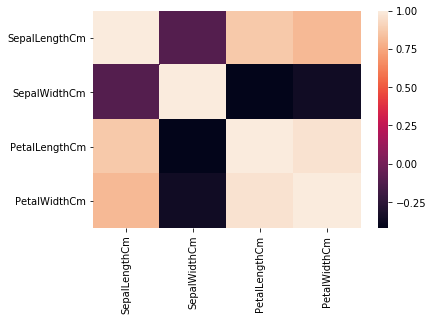

In [177]:
# Find the correlation
sns.heatmap(irisk1.corr())

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [179]:
X1 = irisk1.drop(["Species"], axis=1)
y1 = irisk1["Species"]


In [180]:
irisk1.var() < 0.1

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

## Question 6

*Plot the scatter matrix for all the variables.*

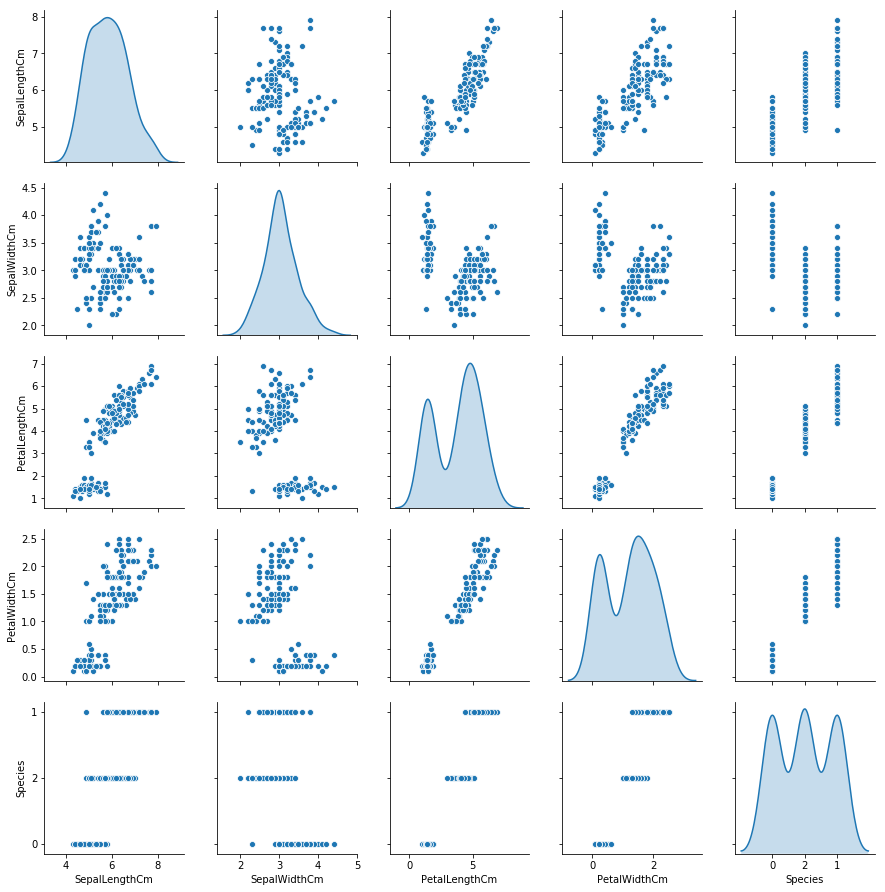

In [236]:
sns.pairplot(irisk1, diag_kind='kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [238]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2, random_state=40)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)
print(X1_train)
print('---------------')
print(y1_train)



[[-1.15661076  0.06798603 -1.27454757 -1.42871332]
 [ 0.44633966 -0.38903118  0.32595916  0.15004752]
 [-0.17017973 -0.38903118  0.26879821  0.15004752]
 [-1.03330688  0.75351185 -1.21738661 -1.03402311]
 [ 0.81625129  0.29649464  0.7832468   1.07099134]
 [-1.40321852  0.29649464 -1.38886948 -1.29714992]
 [ 1.9259862  -0.61753979  1.35485635  0.93942794]
 [-1.52652239  0.75351185 -1.33170852 -1.16558652]
 [ 0.69294742 -0.61753979  1.06905157  1.20255474]
 [ 1.67937844 -0.16052257  1.18337348  0.54473773]
 [-0.17017973  3.03859791 -1.27454757 -1.03402311]
 [-1.52652239  0.06798603 -1.27454757 -1.29714992]
 [-0.29348361 -0.84604839  0.26879821  0.15004752]
 [ 0.1997319  -1.98859142  0.1544763  -0.24464269]
 [ 0.81625129 -0.61753979  0.49744203  0.41317432]
 [-0.66339525  1.43903767 -1.27454757 -1.29714992]
 [-0.910003    0.75351185 -1.27454757 -1.29714992]
 [ 1.30946681  0.29649464  1.12621253  1.46568155]
 [-0.78669912 -0.84604839  0.09731534  0.28161092]
 [ 0.1997319  -1.98859142  0.72

In [256]:
import numpy as np
j = np.arange(1,19,2)
n = 0
MSE=[]
k_val=[]
while n<=len(j)-1:
        k=j[n]
        KNN_model = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric = 'euclidean')
        KNN_model.fit(X1_train, y1_train)
        y1_pred = KNN_model.predict(X1_train)
        MSE.append(1-accuracy_score(y1_train,y1_pred))
        k_val.append(k)
        dataplot = pd.DataFrame([k_val,MSE]).T
        n = n+1
        dataplot.columns=['k','MSE']

print('We can observer that at k=1 the MSE is 0.00, which is the case with most of the dataset, however I would consider k=15 whihc would give me optimum accuracy with MSE as 0.0246')


We can observer that at k=1 the MSE is 0.00, which is the case with most of the dataset, however I would consider k=15 whihc would give me optimum accuracy with MSE as 0.0246


In [268]:
# Predicting the test results
y1_pred = KNN_model.predict(X1_test)
print(y1_pred)
print(y1_test)

['0' '2' '1' '1' '1' '1' '1' '1' '2' '2' '1' '0' '0' '0' '2' '1' '1' '2'
 '1' '0' '2' '2' '1' '0' '2' '2' '2' '0' '2' '0' '0']
40     0
76     2
117    1
116    1
123    1
138    1
102    1
115    1
86     2
127    1
113    1
11     0
42     0
23     0
81     2
140    1
142    1
67     2
103    1
28     0
134    1
68     2
135    1
17     0
53     2
64     2
66     2
18     0
79     2
13     0
38     0
Name: Species, dtype: object


In [269]:
# Accuracy 
accuracy = KNN_model.score(X1_test, y1_test)

print('Accuracy Score of X Test and Y test:', accuracy)


Accuracy Score of X Test and Y test: 0.9354838709677419


In [270]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y1_test, y1_pred)
cm1

array([[ 9,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  9]], dtype=int64)

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [271]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
cv_scores = cross_val_score(KNN_model, X1, y1, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)


[0.93548387 1.         0.93333333 0.96666667 0.93333333]


In [272]:
cv_scores.mean()

0.9537634408602151

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

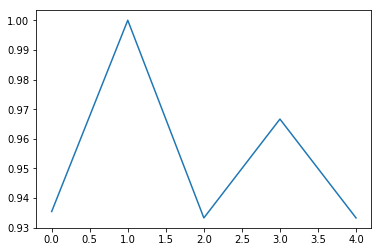

In [275]:
import matplotlib.pyplot as plt
plt.plot(cv_scores)